In [1]:
import os
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt
import numpy as np
import mne
from mne import grand_average

%matplotlib qt

In [ ]:
# Load seperated data files after eog correction
raw = mne.io.read_raw_fif('pre_filtered_data_raw.fif', preload=True)
raw_ica = mne.io.read_raw_fif('ICA000_eog_raw.fif', preload=True)
raw_ssp = mne.io.read_raw_fif('SSP_eog_applied_raw.fif', preload=True)
raw_dss_chan = mne.io.read_raw_fif('dss_meg_eog_chan_raw.fif', preload=True)
raw_dss_thresh = mne.io.read_raw_fif('dss_meg_eog_thresh_raw.fif', preload=True)
raw_dss_eog_eeg = mne.io.read_raw_fif('dss_eog_eeg_raw.fif', preload=True)
#raw_dss_chan = mne.io.read_raw_fif('dss_meg_eog_chan_raw.fif', preload=True)

Opening raw data file pre_filtered_data_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file /home/ijekt/Documents/cs_cog_fat/pre_filtered_data_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...


In [2]:
# Load seperated data files after ecg correction
raw = mne.io.read_raw_fif('pre_filtered_data_raw.fif', preload=True)
raw_ica_ecg = mne.io.read_raw_fif('ICA004_ecg_raw.fif', preload=True)
raw_dss_ecg = mne.io.read_raw_fif('dss_meg_ecg_chan_raw.fif', preload=True)
raw_ssp_ecg = mne.io.read_raw_fif('SSP_ecg_applied_raw.fif', preload=True)

Opening raw data file pre_filtered_data_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file /home/ijekt/Documents/cs_cog_fat/pre_filtered_data_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...
Opening raw data file ICA004_ecg_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file /home/ijekt/Documents/cs_cog_fat/ICA004_ecg_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...
Opening raw data file dss_meg_ecg_chan_raw.fif...
Isotrak not found
    Range : 0 ... 2110999 =      0.000 ...  4221.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...
Opening raw data file SSP_ecg_applied_raw.fif...
    Read a total of 3 projection items:
        ECG-planar--0.200-0.400-PCA-01 (1 x 204) active
        

In [5]:
#add stim channel to object of DSS
stim_data = raw_ica.get_data(picks='STI101')

# Create the Info object for the new channel
stim_info = mne.create_info(['STI101'], raw_ica.info['sfreq'], ['stim'])

# Ensure the stim_data is in the correct shape (n_channels, n_times)
if stim_data.ndim == 1:
    stim_data = stim_data[np.newaxis, :]

# Create a new Raw object with just the stim channel
stim_raw = mne.io.RawArray(stim_data, stim_info)

# Append the stim channel Raw object to the second Raw object
raw_dss_chan.add_channels([stim_raw], force_update_info=True)
raw_dss_thresh.add_channels([stim_raw], force_update_info=True)
raw_dss_eog_eeg.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=2111000
    Range : 0 ... 2110999 =      0.000 ...  4221.998 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,0 points
Good channels,"30 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [14]:
#add eog channel to object of DSS
eog_data = raw.get_data(picks='EOG002')

# Create the Info object for the new channel
eog_info = mne.create_info(['EOG002'], raw.info['sfreq'], ['eog'])

# Ensure the stim_data is in the correct shape (n_channels, n_times)
if eog_data.ndim == 1:
    eog_data = eog_data[np.newaxis, :]

# Create a new Raw object with just the stim channel
eog_raw = mne.io.RawArray(eog_data, eog_info)

# Append the stim channel Raw object to the second Raw object
raw_dss_chan.add_channels([eog_raw], force_update_info=True)
#raw_dss_thresh.add_channels([eog_raw], force_update_info=True)
#raw_dss_eog_eeg.add_channels([eog_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=2111000
    Range : 0 ... 2110999 =      0.000 ...  4221.998 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,0 points
Good channels,"102 Magnetometers, 1 Stimulus, 1 EOG"
Bad channels,None
EOG channels,EOG002
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [6]:
# check channel names
channel_names = raw.info['ch_names']

# Print the channel names
print(channel_names)

['EOG002', 'ECG003', 'ECG', 'BIO005', 'EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'MEG0111', 'MEG0112', 'MEG0113', 'MEG0121', 'MEG0122', 'MEG0123', 'MEG0131', 'MEG0132', 'MEG0133', 'MEG0141', 'MEG0142', 'MEG0143', 'MEG0211', 'MEG0212', 'MEG0213', 'MEG0221', 'MEG0222', 'MEG0223', 'MEG0231', 'MEG0232', 'MEG0233', 'MEG0241', 'MEG0242', 'MEG0243', 'MEG0311', 'MEG0312', 'MEG0313', 'MEG0321', 'MEG0322', 'MEG0323', 'MEG0331', 'MEG0332', 'MEG0333', 'MEG0341', 'MEG0342', 'MEG0343', 'MEG0411', 'MEG0412', 'MEG0413', 'MEG0421', 'MEG0422', 'MEG0423', 'MEG0431', 'MEG0432', 'MEG0433', 'MEG0441', 'MEG0442', 'MEG0443', 'MEG0511', 'MEG0512', 'MEG0513', 'MEG0521', 'MEG0522', 'MEG0523', 'MEG0531', 'MEG0532', 'MEG0533', 'MEG0541', 'MEG0542', 'MEG0543', 'M

In [5]:
# set parameters 
tmin = -0.2  # Start time before event, in seconds
tmax = 0.5   # End time after event, in seconds
baseline = (None, 0)  # Means no baseline correction

In [12]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [14]:
events_raw = mne.find_events(raw, stim_channel='STI102')

2139 events found on stim channel STI102
Event IDs: [  3   4   7   8   9 254 255]


In [16]:
epochs_raw = mne.Epochs(raw, events_raw, event_id=None, tmin=tmin, tmax=tmax, baseline=baseline, preload=True)

Not setting metadata
2139 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2139 events and 351 original time points ...
0 bad epochs dropped


In [17]:
evoked_raw = epochs_raw.average()

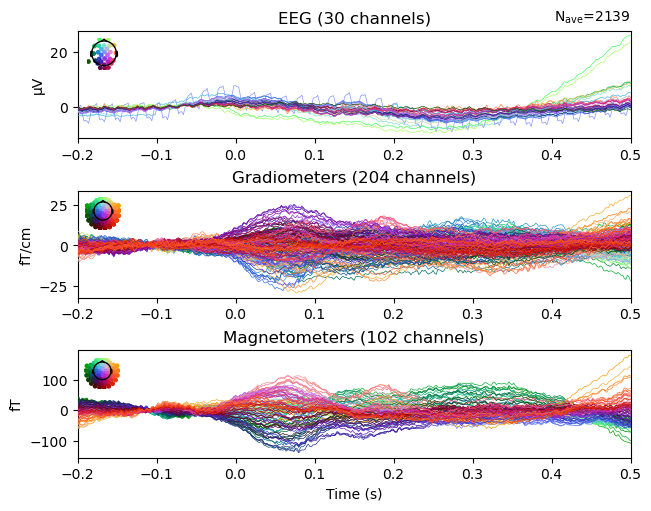

In [18]:
evoked_raw.plot()

In [7]:
raw_evoked = mne.preprocessing.create_eog_epochs(raw).average()
raw_evoked.apply_baseline(baseline=(None, -0.2))
raw_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [8]:
ica_evoked = mne.preprocessing.create_eog_epochs(raw_ica).average()
ica_evoked.apply_baseline(baseline=(None, -0.2))
ica_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [9]:
eog_ssp_evoked = mne.preprocessing.create_eog_epochs(raw_ssp).average()
eog_ssp_evoked.apply_baseline(baseline=(None, -0.2))
eog_ssp_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 197 events 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | EOG-planar--0.200-0.200-PCA-01, active : True, n_channels : 204, exp. var : 91.73%>
Removing projector <Projection | EOG-axial--0.200-0.200-PCA-01, active : True, n_channels : 102, exp. var : 96.08%>
Removing projector <Projection | EOG-planar--0.200-0.200-PCA-01, active : True, n_channels : 204, exp. var : 91.73%>
Removing projector <Projection | EOG-eeg--0.200-0.200-PCA-01, active : True, n_channels : 30, exp. var : 86.14%>
Removing projector <Projection | EOG-axial--0.200-0.200-PCA-01, active : True, n_channels : 102, exp. var : 96.08%>
Removing projector <Projection | EOG-eeg--0.200-0.200-PCA-01, active : True, n_channels : 30, exp. var : 86.14%>


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [12]:
dss_thresh_evoked = mne.preprocessing.create_eog_epochs(raw_dss_thresh).average()
dss_thresh_evoked.apply_baseline(baseline=(None, -0.2))
dss_thresh_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [103]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


/tmp/ipykernel_4559/3493037452.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  dss_thresh_evoked.plot_joint()


ValueError: Cannot determine location of MEG/EOG/ECG channels using digitization points.

In [16]:
dss_eeg_evoked = mne.preprocessing.create_eog_epochs(raw_dss_eog_eeg).average()
dss_eeg_evoked.apply_baseline(baseline=(None, -0.2))
dss_eeg_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [31]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


/tmp/ipykernel_4559/2438175494.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  dss_eeg_evoked.plot_joint()


RuntimeError: No digitization points found.

In [3]:
#add ecg channel to object of DSS
ecg_data = raw.get_data(picks='ECG')

# Create the Info object for the new channel
ecg_info = mne.create_info(['ECG'], raw.info['sfreq'], ['ecg'])

# Ensure the stim_data is in the correct shape (n_channels, n_times)
if ecg_data.ndim == 1:
    ecg_data = ecg_data[np.newaxis, :]

# Create a new Raw object with just the stim channel
ecg_raw = mne.io.RawArray(ecg_data, ecg_info)

# Append the stim channel Raw object to the second Raw object
raw_dss_ecg.add_channels([ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=2111000
    Range : 0 ... 2110999 =      0.000 ...  4221.998 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,0 points
Good channels,"102 Magnetometers, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,ECG
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [4]:
dss_ecg_evoked = mne.preprocessing.create_ecg_epochs(raw_dss_ecg).average()
dss_ecg_evoked.apply_baseline(baseline=(None, -0.2))
dss_ecg_evoked.plot_joint()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


/tmp/ipykernel_4607/1540208699.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  dss_ecg_evoked.plot_joint()


ValueError: Cannot determine location of MEG/EOG/ECG channels using digitization points.

In [5]:
ica_ecg_evoked = mne.preprocessing.create_ecg_epochs(raw_ica_ecg).average()
ica_ecg_evoked.apply_baseline(baseline=(None, -0.2))
ica_ecg_evoked.plot_joint()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [6]:
ssp_ecg_evoked = mne.preprocessing.create_ecg_epochs(raw_ssp_ecg).average()
ssp_ecg_evoked.apply_baseline(baseline=(None, -0.2))
ssp_ecg_evoked.plot_joint()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | ECG-pl

[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [7]:
raw_ecg_evoked = mne.preprocessing.create_ecg_epochs(raw).average()
raw_ecg_evoked.apply_baseline(baseline=(None, -0.2))
raw_ecg_evoked.plot_joint()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [42]:
eog_evks = {"raw":raw_evoked, "ica":ica_evoked, "ssp":eog_ssp_evoked, "dss":dss_thresh_evoked}

In [43]:
# Assuming eog_evks is a dictionary of Evoked objects
if isinstance(eog_evks, dict):
    eog_evks_mag = {key: val.copy().pick_types(meg='mag') for key, val in eog_evks.items()}
else:
    raise ValueError("eog_evks must be a dictionary of Evoked objects.")

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | EOG-planar--0.200-0.200-PCA-01, active : True, n_channels : 204, exp. var : 91.73%>
Removing projector <Projection | EOG-eeg--0.200-0.200-PCA-01, active : True, n_channels : 30, exp. var : 86.14%>
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [79]:
# Define custom functions for different operations
def max_func(x):
    return x.max(axis=1)

def min_func(x):
    return x.min(axis=1)

def std_func(x):
    return np.std(x, axis=1)

def var_func(x):
    return np.var(x, axis=1)

def sum_func(x):
    return np.sum(x, axis=1)

def ptp_func(x):
    return np.ptp(x, axis=1)

In [48]:
def custom_func(x):
    return x.max(axis=1)


for combine in ("mean", "median", "std", custom_func):
    mne.viz.plot_compare_evokeds(eog_evks_mag, picks="mag", combine=combine)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "std"
combining channels using "std"
combining channels using "std"
combining channels using "std"
combining channels using "<function custom_func at 0x7f807d37c160>"
combining channels using "<function custom_func at 0x7f807d37c160>"
combining channels using "<function custom_func at 0x7f807d37c160>"
combining channels using "<function custom_func at 0x7f807d37c160>"


In [23]:
eeg_eog_evks = {"raw":raw_evoked, "ica":ica_evoked, "ssp":eog_ssp_evoked, "dss":dss_eeg_evoked}

In [29]:
eog_evks_eeg = {key: val.copy().pick_types(eeg=True) for key, val in eeg_eog_evks.items()}

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | EOG-planar--0.200-0.200-PCA-01, active : True, n_channels : 204, exp. var : 91.73%>
Removing projector <Projection | EOG-axial--0.200-0.200-PCA-01, active : True, n_channels : 102, exp. var : 96.08%>
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [74]:
def custom_func(x):
    return x.max(axis=1)


for combine in ("mean", "median", "std", custom_func):
    mne.viz.plot_compare_evokeds(eog_evks_eeg, picks="eeg", combine=combine)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "std"
combining channels using "std"
combining channels using "std"
combining channels using "std"
combining channels using "<function custom_func at 0x7fea2ca01ca0>"
combining channels using "<function custom_func at 0x7fea2ca01ca0>"
combining channels using "<function custom_func at 0x7fea2ca01ca0>"
combining channels using "<function custom_func at 0x7fea2ca01ca0>"


In [8]:
ecg_evks = {"raw":raw_ecg_evoked, "ica":ica_ecg_evoked, "ssp":ssp_ecg_evoked, "dss":dss_ecg_evoked}

In [11]:
# Assuming eog_evks is a dictionary of Evoked objects
if isinstance(ecg_evks, dict):
    ecg_evks_mag = {key: val.copy().pick_types(meg='mag') for key, val in ecg_evks.items()}
else:
    raise ValueError("ecg_evks must be a dictionary of Evoked objects.")

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | ECG-planar--0.200-0.400-PCA-01, active : True, n_channels : 204, exp. var : 84.15%>
Removing projector <Projection | ECG-eeg--0.200-0.400-PCA-01, active : True, n_channels : 30, exp. var : 78.11%>
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [12]:
def custom_func(x):
    return x.max(axis=1)


for combine in ("mean", "median", "std", custom_func):
    mne.viz.plot_compare_evokeds(ecg_evks_mag, picks="mag", combine=combine)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "std"
combining channels using "std"
combining channels using "std"
combining channels using "std"
combining channels using "<function custom_func at 0x7f7db1e3a0d0>"
combining channels using "<function custom_func at 0x7f7db1e3a0d0>"
combining channels using "<function custom_func at 0x7f7db1e3a0d0>"
combining channels using "<function custom_func at 0x7f7db1e3a0d0>"


In [25]:
mne.viz.plot_compare_evokeds(
    ecg_evks_mag,
    picks="MEG1611",
    colors={"raw":'blue', "ica":'orange', "ssp":'green', "dss":'red'}, 
    linestyles={'dss': '-', 'raw': '-', 'ssp': '-', 'ica': '-'},
    time_unit="ms",
)

[<Figure size 800x600 with 2 Axes>]

In [23]:
mne.viz.plot_compare_evokeds(
    eog_evks_mag,
    picks="MEG1411",
    colors={"raw":'blue', "ica":'orange', "ssp":'green', "dss":'red'}, 
    linestyles={'dss': '-', 'raw': '-', 'ssp': '-', 'ica': '-'},
    time_unit="ms",
)

NameError: name 'eog_evks_mag' is not defined

In [35]:
mne.viz.plot_compare_evokeds(
    eog_evks_eeg,
    picks="EEG006",
    colors={"raw":'blue', "ica":'orange', "ssp":'green', "dss":'red'}, 
    linestyles={'dss': '-', 'raw': '-', 'ssp': '-', 'ica': '-'},
    time_unit="ms",
)

[<Figure size 800x600 with 2 Axes>]

In [15]:
# check channel names
channel_names = raw.info['ch_names']

# Print the channel names
print(channel_names)

['EOG002', 'ECG003', 'ECG', 'BIO005', 'EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'MEG0111', 'MEG0112', 'MEG0113', 'MEG0121', 'MEG0122', 'MEG0123', 'MEG0131', 'MEG0132', 'MEG0133', 'MEG0141', 'MEG0142', 'MEG0143', 'MEG0211', 'MEG0212', 'MEG0213', 'MEG0221', 'MEG0222', 'MEG0223', 'MEG0231', 'MEG0232', 'MEG0233', 'MEG0241', 'MEG0242', 'MEG0243', 'MEG0311', 'MEG0312', 'MEG0313', 'MEG0321', 'MEG0322', 'MEG0323', 'MEG0331', 'MEG0332', 'MEG0333', 'MEG0341', 'MEG0342', 'MEG0343', 'MEG0411', 'MEG0412', 'MEG0413', 'MEG0421', 'MEG0422', 'MEG0423', 'MEG0431', 'MEG0432', 'MEG0433', 'MEG0441', 'MEG0442', 'MEG0443', 'MEG0511', 'MEG0512', 'MEG0513', 'MEG0521', 'MEG0522', 'MEG0523', 'MEG0531', 'MEG0532', 'MEG0533', 'MEG0541', 'MEG0542', 'MEG0543', 'M